<a href="https://colab.research.google.com/github/spjoshi96/Predicting-the-Accurate-mileage-of-vehicle-/blob/main/Business_Analytics_in_python2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [ ]:
#importing libraries and reading csv file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


my_data = pd.read_csv('auto-mpg.csv')

In [ ]:
my_data.shape

(398, 9)

In [ ]:
my_data.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
317,34.3,4,97.0,78,2188,15.8,80,2,audi 4000
307,26.8,6,173.0,115,2700,12.9,79,1,oldsmobile omega brougham
73,13.0,8,307.0,130,4098,14.0,72,1,chevrolet chevelle concours (sw)
177,23.0,4,115.0,95,2694,15.0,75,2,audi 100ls
319,31.3,4,120.0,75,2542,17.5,80,3,mazda 626
375,36.0,4,105.0,74,1980,15.3,82,2,volkswagen rabbit l
387,38.0,6,262.0,85,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)
367,28.0,4,112.0,88,2605,19.6,82,1,chevrolet cavalier
327,36.4,5,121.0,67,2950,19.9,80,2,audi 5000s (diesel)
64,15.0,8,318.0,150,4135,13.5,72,1,plymouth fury iii


In [ ]:
my_data = my_data.drop('car name', axis = 1)

In [ ]:
my_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
my_data['origin'] = my_data['origin'].replace({1:'america', 2:'europe', 3:'asia'})

In [ ]:
my_data = pd.get_dummies(my_data, columns = ['origin'])

In [ ]:
my_data.sample(15)

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
78,21.0,4,120.0,87,2979,19.5,72,0,0,1
168,23.0,4,140.0,83,2639,17.0,75,1,0,0
47,19.0,6,250.0,100,3282,15.0,71,1,0,0
367,28.0,4,112.0,88,2605,19.6,82,1,0,0
141,29.0,4,98.0,83,2219,16.5,74,0,0,1
25,10.0,8,360.0,215,4615,14.0,70,1,0,0
366,17.6,6,225.0,85,3465,16.6,81,1,0,0
229,16.0,8,400.0,180,4220,11.1,77,1,0,0
106,12.0,8,350.0,180,4499,12.5,73,1,0,0
138,14.0,8,318.0,150,4457,13.5,74,1,0,0


In [ ]:
my_data.describe()

,mpg,cyl,disp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [ ]:
my_data.describe(include = 'all')

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [ ]:
my_data.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [ ]:
hpisdigit = pd.DataFrame(my_data.hp.str.isdigit())  # if the string is made of digit store it true else false 

In [ ]:
my_data[hpisdigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [ ]:
my_data = my_data.replace('?', np.NaN)   # replacing ? with None values
my_data[hpisdigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [ ]:
my_data.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [ ]:
medianFiller = lambda x: x.fillna(x.median())   # replacing Nan values with the median
my_data = my_data.apply(medianFiller, axis = 0)

In [ ]:
my_data['hp'] = my_data['hp'].astype('float64')  # converting hp column values from string to float

In [ ]:
my_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


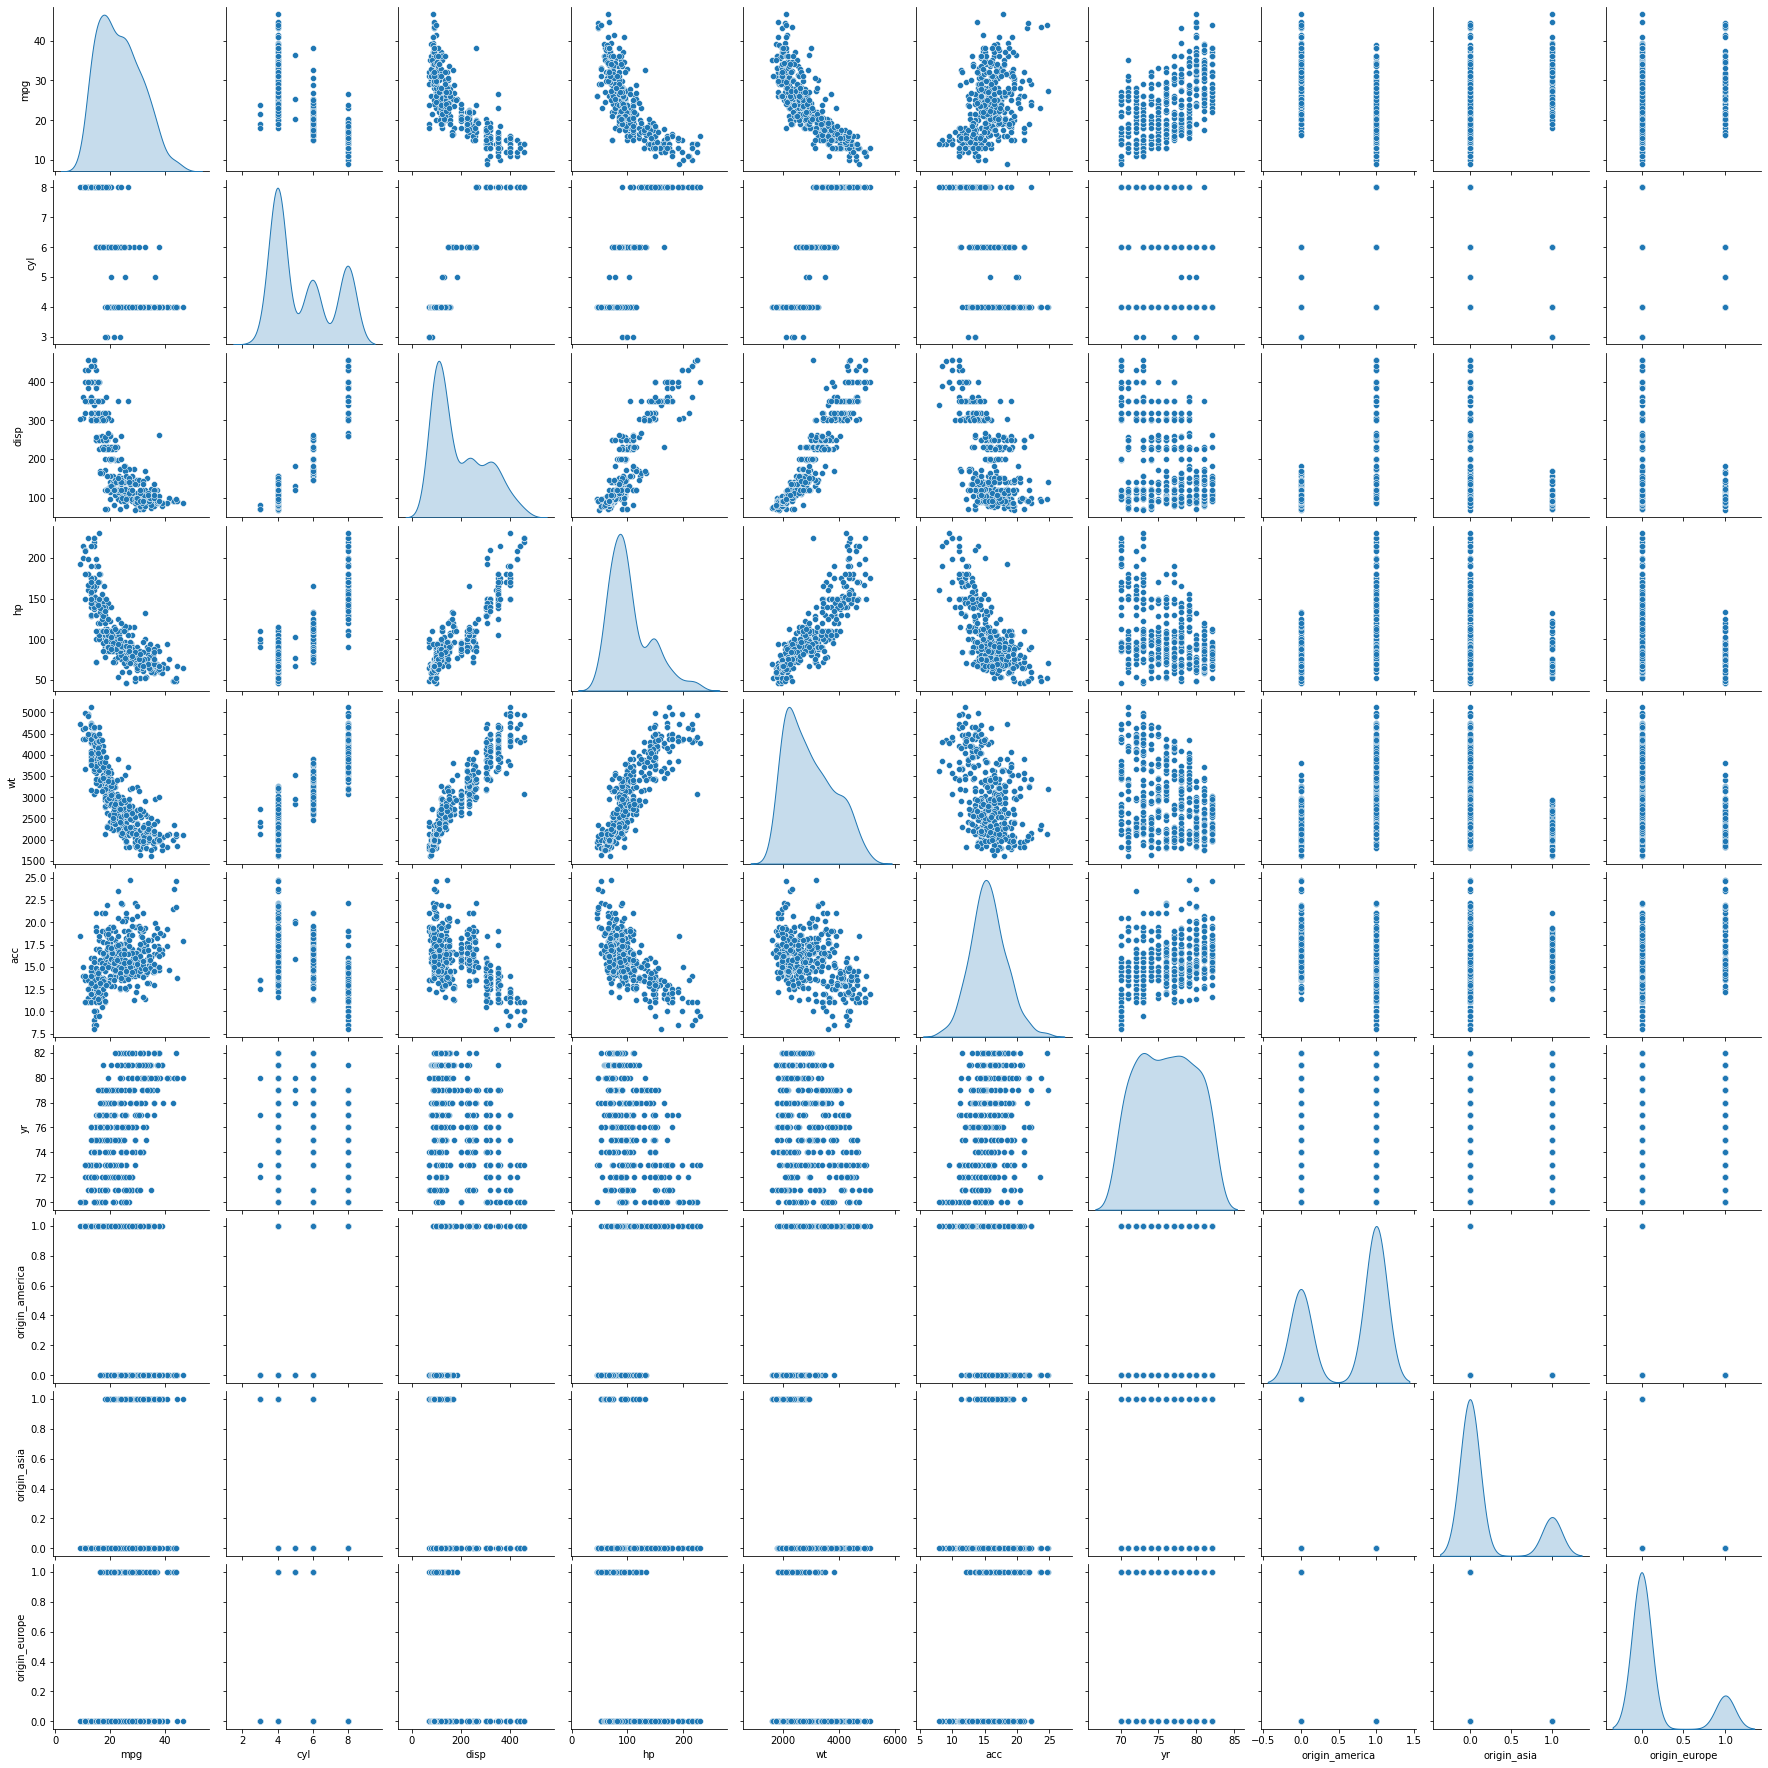

In [ ]:
sns.pairplot(my_data, diag_kind='kde')

In [ ]:
x = my_data.drop(['mpg'], axis = 1)
y = my_data[['mpg']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)

In [ ]:
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg_model.score(x_train, y_train)  # calculating score R^2 value for train data

0.8141025501610559

In [ ]:
reg_model.score(x_test, y_test)  # calculating score R^2 value for test data

0.8433135132808827

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree = 2, interaction_only =True)
x_train2 =poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
poly_model = linear_model.LinearRegression()
poly_model.fit(x_train2, y_train)
y_predict = poly_model.predict(x_test2)

print(poly_model.score(x_train2, y_train))


0.8995492104963149


In [ ]:
print(poly_model.score(x_test2, y_test))

0.8613490752804132
